In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from conda_forge_tick.utils import load_graph

/home/christopher/dev/cf-scripts/conda_forge_tick/utils.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Set, MutableMapping
/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):
/home/christopher/dev/cf-scripts/conda_forge_tick/utils.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop wo

In [3]:
gx = load_graph()

In [4]:
[n for n in gx.nodes if 'stub' in n]

['pthread-stubs',
 'xorg-libpthread-stubs',
 'c_compiler_stub',
 'cxx_compiler_stub',
 'fortran_compiler_stub',
 'm2w64_c_compiler_stub',
 'm2w64_cxx_compiler_stub',
 'm2w64_fortran_compiler_stub',
 'compatible_pin_stub',
 'subpackage_stub',
 'cdt_stub',
 'go_compiler_stub',
 'cgo_compiler_stub',
 'pyspark-stubs',
 'cuda_compiler_stub']

In [52]:
langs = {'python': 'Python', 'c_compiler_stub': 'C', 'cxx_compiler_stub': 'C++', 'fortran_compiler_stub': 'Fortran', 'go_compiler_stub': 'Go', 'r-base': 'R', 'perl': 'Perl'}

In [53]:
double = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 2])
triple = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) >= 3])
others = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 0])

In [54]:
ns = [len(list(gx.successors(k))) for k in langs]

In [55]:
ns.extend([double, triple, others])
langs.update({'other': 'Other', 'double': 'Dual', 'triple': 'Polyglot'})

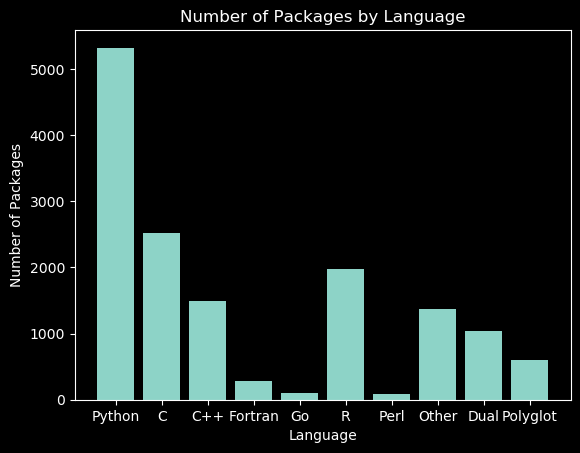

In [56]:
with plt.style.context('dark_background', 'presentation'):
    fig, ax = plt.subplots()
    ax.bar(*zip(*enumerate(ns)))
    ax.set_xticks(range(len(ns)))
    ax.set_xticklabels(langs.values(), ha='center')
    ax.set_title('Number of Packages by Language')
    ax.set_xlabel('Language')
    ax.set_ylabel('Number of Packages')

In [57]:
fig.savefig('n_packages_by_lang.png')